# Afficher la première image

In [14]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

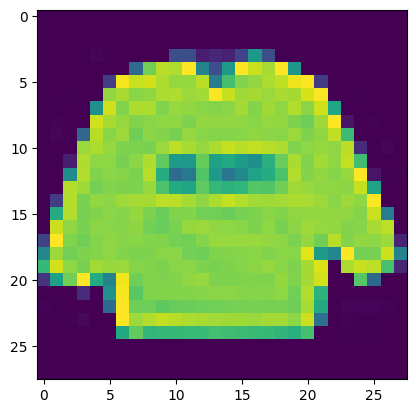

In [15]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

# Préparation des données d’apprentissage

In [16]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [17]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [18]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Un réseau avec une seule couche de convolution

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

# Compilation, apprentissage et test

In [20]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [21]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8047 - loss: 0.5601 - val_accuracy: 0.8522 - val_loss: 0.4230
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8693 - loss: 0.3694 - val_accuracy: 0.8814 - val_loss: 0.3416
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8878 - loss: 0.3209 - val_accuracy: 0.8910 - val_loss: 0.3107
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8977 - loss: 0.2920 - val_accuracy: 0.8866 - val_loss: 0.3174
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9040 - loss: 0.2710 - val_accuracy: 0.8969 - val_loss: 0.2878
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9086 - loss: 0.2566 - val_accuracy: 0.9024 - val_loss: 0.2756
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9138 - loss: 0.2398 - val_accuracy: 0.9019 - val_loss: 0.2739
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9187 - loss: 0.2256 - val_accu

In [22]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.24158437550067902
Précision: 0.9176999926567078


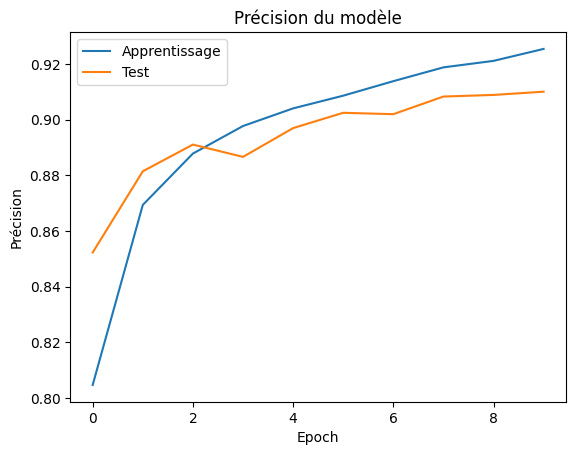

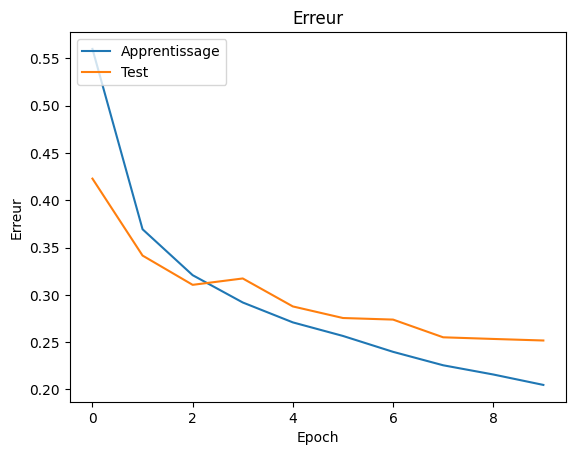

In [23]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

# Augmentation du nombre de données

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [25]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8275 - loss: 0.4674 - val_accuracy: 0.8431 - val_loss: 0.4237
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8477 - loss: 0.4321

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8477 - loss: 0.4321 - val_accuracy: 0.8398 - val_loss: 0.4277
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8434 - loss: 0.4161 - val_accuracy: 0.8492 - val_loss: 0.4063
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8594 - loss: 0.3773 - val_accuracy: 0.8499 - val_loss: 0.4007
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8535 - loss: 0.3966 - val_accuracy: 0.8578 - val_loss: 0.3833
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8672 - loss: 0.3247 - val_accuracy: 0.8624 - val_loss: 0.3771
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8599 - loss: 0.3782 - val_accuracy: 0.8649 - val_loss: 0.3627
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8672 - loss: 0.3784 - val_accuracy: 0.8624 - val_loss: 0.3727
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8625 - loss: 0.3693 - val_accuracy: 0.8675 - 

# Sauvegarde du modèle

In [27]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


# Un modèle plus performant

In [28]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.7436 - loss: 0.7277 - val_accuracy: 0.1047 - val_loss: 4.1811
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 35s 185ms/step - accuracy: 0.8427 - loss: 0.4348 - val_accuracy: 0.2721 - val_loss: 3.3454
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 35s 184ms/step - accuracy: 0.8718 - loss: 0.3617 - val_accuracy: 0.8255 - val_loss: 0.4955
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.8853 - loss: 0.3265 - val_accuracy: 0.8972 - val_loss: 0.2807
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.8946 - loss: 0.2988 - val_accuracy: 0.9040 - val_loss: 0.2643
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 0.8969 - loss: 0.2893 - val_accuracy: 0.9111 - val_loss: 0.2444
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 0.9050 - loss: 0.2660 - val_accuracy: 0.9124 - val_loss: 0.2424
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.9084 - loss: 0

In [30]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.21114549040794373
Précision: 0.9243999719619751


In [31]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 32s 163ms/step - accuracy: 0.8524 - loss: 0.4075 - val_accuracy: 0.8425 - val_loss: 0.4088
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8672 - loss: 0.3590 - val_accuracy: 0.8497 - val_loss: 0.3921
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 31s 164ms/step - accuracy: 0.8693 - loss: 0.3600 - val_accuracy: 0.8901 - val_loss: 0.3002
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8867 - loss: 0.3402 - val_accuracy: 0.8910 - val_loss: 0.2994
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - accuracy: 0.8767 - loss: 0.3396 - val_accuracy: 0.8916 - val_loss: 0.2992
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8789 - loss: 0.3539 - val_accuracy: 0.8899 - val_loss: 0.3013
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 31s 166ms/step - accuracy: 0.8830 - loss: 0.3264 - val_accuracy: 0.8909 - val_loss: 0.2933
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8945 - loss: 0.2920 - va